In [2]:
# initial parameters 
alpha = 0.4 #household external infection rate 
beta = 0.2  #household internal infection rate
gamma = 0.2 

P1 = 12/600
P2 = 0.0
P0 = 1-P1-P2
dP0dt = - alpha*(P1+2*P2)*P0 + gamma * P1 
dP1dt = alpha*(P1+2*P2)*P0 - ((alpha/2)*(P1+2*P2)+beta+gamma)*P1 + 2 * gamma * P2
dP2dt = (alpha/2*(P1+2*P2)+beta)*P1 - 2 * gamma * P2
TI2 = dP1dt + 2 * dP2dt # total expected infected rate
#dTI2dt = alpha*(P1+2*P2)*P0+((alpha/2)*(P1+2*P2)+beta-gamma)*P1 - 2*gamma*P2
print(P1)
print(P0)
print(dP0dt)
print(dP1dt)
print(dP2dt)
print(TI2)
print(f'{dP0dt},{dP1dt},{dP2dt},{TI2}')
print(f'{P0},{P1},{P2},{TI2}')


1/50
0.980000000000000
-0.00384000000000000
-0.000240000000000001
0.00408000000000000
0.00792000000000000
-0.00384000000000000,-0.000240000000000001,0.00408000000000000,0.00792000000000000
0.980000000000000,1/50,0.000000000000000,0.00792000000000000


  message: The solver successfully reached the end of the integration interval.
  success: True
   status: 0
        t: [ 0.000e+00  1.000e+00 ...  4.900e+01  5.000e+01]
        y: [[ 9.800e-01  9.746e-01 ...  1.515e-01  1.515e-01]
            [ 2.000e-02  2.187e-02 ...  3.941e-01  3.943e-01]
            [ 0.000e+00  3.491e-03 ...  4.544e-01  4.543e-01]
            [ 7.920e-03  1.677e-02 ...  1.291e+00  1.291e+00]]
      sol: None
 t_events: None
 y_events: None
     nfev: 146
     njev: 0
      nlu: 0


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


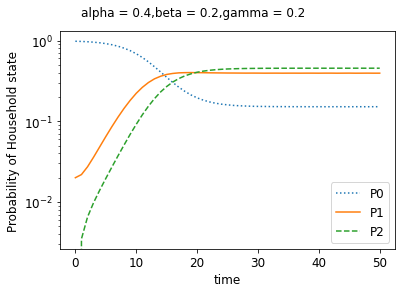

In [6]:
3# fig 2 pg 3 Dyson et al.(2017)
# In (1200 persons) 600household, 12 households with one infected, 0  with 2 infected , all are zero infected is rest = 
from scipy.integrate import solve_ivp
import numpy as np
import matplotlib.pyplot as plt
def odes(t, P):
    alpha = 0.4
    beta = 0.2
    gamma = 0.2
    # assign each ODE to a vector element
    P0 = P[0]
    P1 = P[1]
    P2 = P[2]
    TI2 = P[3] # making expection rate as 4th vector with TI2 
    # define each ODE
    dP0dt = -alpha*(P1+2*P2)*P0 + gamma * P1
    dP1dt = alpha*(P1+2*P2)*P0 - ((alpha/2)*(P1+2*P2)+beta+gamma)*P1 + 2 * gamma * P2
    dP2dt = ((alpha/2)*(P1+2*P2)+beta)*P1 - 2 * gamma * P2
    dTI2dt = dP1dt + 2 * dP2dt
    #dexpIdt = alpha*(P1+2*P2)*P0+((alpha/2)*(P1+2*P2)+beta-gamma)*P1 - 2*gamma*P2
    return np.array([dP0dt,dP1dt,dP2dt,dTI2dt])
t_span = np.array([0,50])
times = np.linspace(t_span[0],t_span[1],51)
#intial conditions
Pi = np.array([0.98,0.02,0,0.00792])
sol = solve_ivp(odes,t_span,Pi,t_eval=times)
print(sol)
t = sol.t
P0 = sol.y[0]# should be y not P
P1 = sol.y[1]
P2 = sol.y[2]
TI2 = sol.y[3]

plt.rc("font",size=12)
plt.figure()
plt.text(1,2,'alpha = 0.4,beta = 0.2,gamma = 0.2', fontsize=12 )
plt.semilogy(t,P0,':', label = 'P0')
plt.semilogy(t,P1,'-', label = 'P1')
plt.semilogy(t,P2,'--', label = 'P2')
#plt.semilogy(t,TI2,'.', label = 'TI2')
plt.xlabel("time")
plt.ylabel("Probability of Household state")
plt.legend()
plt.savefig("01g1.eps")

#plt.show()

output_timeline01g1 = open("output_timeline01g1.txt","w")

for i in range(len(t)):
    write_in = f"time: {t[i]}, P0: {P0[i]}, P1: {P1[i]}, P2: {P2[i]}, TI2: {TI2[i]}\n"
    output_timeline01g1.write(write_in)
    #print(f"time: {t[i]}, P0: {P0[i]}, P1: {P1[i]}, P2: {P2[i]}, TI2: {TI2[i]}")

output_timeline01g1.close()

In [7]:
# initial parameters 
alpha = 0.5
beta = 0.2
gamma = 0.2

P1 = 12/600
P2 = 0
P0 = 1-P1-P2
dP0dt = -alpha * ( P1 + 2 * P2 ) * P0 + gamma * P1 
dP1dt = alpha*(P1+2*P2)*P0 - ( ( alpha / 2 ) * ( P1 + 2 * P2 ) + beta + gamma ) * P1 + 2 * gamma * P2
dP2dt = ( ( alpha / 2 ) * ( P1 + 2 * P2 ) + beta ) * P1 - 2 * gamma * P2
TI2 = dP1dt + 2 * dP2dt
#dTI2dt = alpha*(P1+2*P2)*P0+((alpha/2)*(P1+2*P2)+beta-gamma)*P1 - 2*gamma*P2
print(P1)
print(P0)
print(dP0dt)
print(dP1dt)
print(dP2dt)
print(TI2)
print(f'{dP0dt},{dP1dt},{dP2dt},{TI2}')
print(f'{P0},{P1},{P2},{TI2}')


0.02
0.98
-0.0058
0.0016999999999999984
0.0041
0.009899999999999999
-0.0058,0.0016999999999999984,0.0041,0.009899999999999999
0.98,0.02,0,0.009899999999999999


  message: The solver successfully reached the end of the integration interval.
  success: True
   status: 0
        t: [ 0.000e+00  1.000e+00 ...  4.900e+01  5.000e+01]
        y: [[ 9.800e-01  9.719e-01 ...  1.063e-01  1.063e-01]
            [ 2.000e-02  2.440e-02 ...  3.749e-01  3.750e-01]
            [ 0.000e+00  3.729e-03 ...  5.188e-01  5.187e-01]
            [ 9.900e-03  2.176e-02 ...  1.402e+00  1.402e+00]]
      sol: None
 t_events: None
 y_events: None
     nfev: 170
     njev: 0
      nlu: 0


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


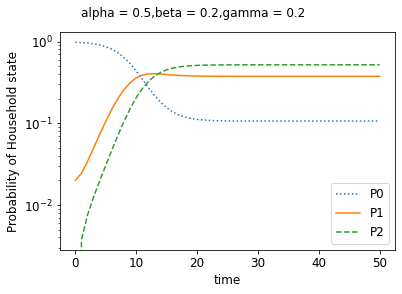

In [8]:
from scipy.integrate import solve_ivp
import numpy as np
import matplotlib.pyplot as plt
def odes(t, P):
    #constants
    # these values are taken from page 3 dyson et.al 
    alpha = 0.5
    beta = 0.2
    gamma = 0.2
    # assign each ODE to a vector element
    P0 = P[0]
    P1 = P[1]
    P2 = P[2]
    TI2 = P[3] # making expection rate as 4th vector with TI2 
    # define each ODE
    dP0dt = -alpha*(P1+2*P2)*P0 + gamma * P1
    dP1dt = alpha*(P1+2*P2)*P0 - ((alpha/2)*(P1+2*P2)+beta+gamma)*P1 + 2 * gamma * P2
    dP2dt = (alpha/2*(P1+2*P2)+beta)*P1 - 2 * gamma * P2
    dTI2dt = dP1dt + 2 * dP2dt
    #dexpIdt = alpha*(P1+2*P2)*P0+((alpha/2)*(P1+2*P2)+beta-gamma)*P1 - 2*gamma*P2
    return np.array([dP0dt,dP1dt,dP2dt,dTI2dt])
t_span = np.array([0,50])
times = np.linspace(t_span[0],t_span[1],51)
#intial conditions
Pi = np.array([0.98,0.02,0,0.009899999999999999])


sol = solve_ivp(odes,t_span,Pi,t_eval=times)
print(sol)
t = sol.t
P0 = sol.y[0]# y not P
P1 = sol.y[1]
P2 = sol.y[2]
TI2 = sol.y[3]

plt.rc("font",size=12)
plt.figure()
plt.text(1,2,'alpha = 0.5,beta = 0.2,gamma = 0.2', fontsize=12 )
plt.semilogy(t,P0,':', label = 'P0')
plt.semilogy(t,P1,'-', label = 'P1')
plt.semilogy(t,P2,'--', label = 'P2')
#plt.semilogy(t,TI2,'.', label = 'TI2')
plt.xlabel("time")
plt.ylabel("Probability of Household state")
plt.legend()
plt.savefig("021_g2.eps")

#plt.show()


output_timeline021_g2 = open("output_timelineg021_g2.txt","w")

for i in range(len(t)):
    write_in = f"time: {t[i]}, P0: {P0[i]}, P1: {P1[i]}, P2: {P2[i]}, TI2: {TI2[i]}\n"
    output_timeline021_g2.write(write_in)
    #print(f"time: {t[i]}, P0: {P0[i]}, P1: {P1[i]}, P2: {P2[i]}, TI2: {TI2[i]}")

output_timeline021_g2.close()

In [1]:
alpha = 0.6
beta = 0.2
gamma = 0.2

P1 = 12/600
P2 = 0
P0 = 1-P1-P2
dP0dt = -alpha * ( P1 + 2 * P2 ) * P0 + gamma * P1 
dP1dt = alpha*(P1+2*P2)*P0 - ( ( alpha / 2 ) * ( P1 + 2 * P2 ) + beta + gamma ) * P1 + 2 * gamma * P2
dP2dt = ( ( alpha / 2 ) * ( P1 + 2 * P2 ) + beta ) * P1 - 2 * gamma * P2
TI2 = dP1dt + 2 * dP2dt
#dTI2dt = alpha*(P1+2*P2)*P0+((alpha/2)*(P1+2*P2)+beta-gamma)*P1 - 2*gamma*P2
print(P1)
print(P0)
print(dP0dt)
print(dP1dt)
print(dP2dt)
print(TI2)
print(f'{dP0dt},{dP1dt},{dP2dt},{TI2}')
print(f'{P0},{P1},{P2},{TI2}')

0.02
0.98
-0.0077599999999999995
0.003639999999999999
0.00412
0.01188
-0.0077599999999999995,0.003639999999999999,0.00412,0.01188
0.98,0.02,0,0.01188


In [ ]:
from scipy.integrate import solve_ivp
import numpy as np
import matplotlib.pyplot as plt
def odes(t, P):
    #constants
    # these values are taken from page 3 dyson et.al 
    alpha = 0.5
    beta = 0.2
    gamma = 0.2
    # assign each ODE to a vector element
    P0 = P[0]
    P1 = P[1]
    P2 = P[2]
    TI2 = P[3] # making expection rate as 4th vector with TI2 
    # define each ODE
    dP0dt = -alpha*(P1+2*P2)*P0 + gamma * P1
    dP1dt = alpha*(P1+2*P2)*P0 - ((alpha/2)*(P1+2*P2)+beta+gamma)*P1 + 2 * gamma * P2
    dP2dt = (alpha/2*(P1+2*P2)+beta)*P1 - 2 * gamma * P2
    dTI2dt = dP1dt + 2 * dP2dt
    #dexpIdt = alpha*(P1+2*P2)*P0+((alpha/2)*(P1+2*P2)+beta-gamma)*P1 - 2*gamma*P2
    return np.array([dP0dt,dP1dt,dP2dt,dTI2dt])
t_span = np.array([0,50])
times = np.linspace(t_span[0],t_span[1],51)
#intial conditions
Pi = np.array([0.98,0.02,0,0.009899999999999999])


sol = solve_ivp(odes,t_span,Pi,t_eval=times)
print(sol)
t = sol.t
P0 = sol.y[0]# y not P
P1 = sol.y[1]
P2 = sol.y[2]
TI2 = sol.y[3]

plt.rc("font",size=12)
plt.figure()
plt.text(1,2,'alpha = 0.5,beta = 0.2,gamma = 0.2', fontsize=12 )
plt.semilogy(t,P0,':', label = 'P0')
plt.semilogy(t,P1,'-', label = 'P1')
plt.semilogy(t,P2,'--', label = 'P2')
#plt.semilogy(t,TI2,'.', label = 'TI2')
plt.xlabel("time")
plt.ylabel("Probability of Household state")
plt.legend()
plt.savefig("021_g2.eps")

#plt.show()


output_timeline021_g2 = open("output_timelineg021_g2.txt","w")

for i in range(len(t)):
    write_in = f"time: {t[i]}, P0: {P0[i]}, P1: {P1[i]}, P2: {P2[i]}, TI2: {TI2[i]}\n"
    output_timeline021_g2.write(write_in)
    #print(f"time: {t[i]}, P0: {P0[i]}, P1: {P1[i]}, P2: {P2[i]}, TI2: {TI2[i]}")

output_timeline021_g2.close()

In [3]:
alpha = 0.6
beta = 0.2
gamma = 0.2

P1 = 12/600
P2 = 0
P0 = 1-P1-P2
dP0dt = -alpha * ( P1 + 2 * P2 ) * P0 + gamma * P1 
dP1dt = alpha*(P1+2*P2)*P0 - ( ( alpha / 2 ) * ( P1 + 2 * P2 ) + beta + gamma ) * P1 + 2 * gamma * P2
dP2dt = ( ( alpha / 2 ) * ( P1 + 2 * P2 ) + beta ) * P1 - 2 * gamma * P2
TI2 = dP1dt + 2 * dP2dt
#dTI2dt = alpha*(P1+2*P2)*P0+((alpha/2)*(P1+2*P2)+beta-gamma)*P1 - 2*gamma*P2
print(P1)
print(P0)
print(dP0dt)
print(dP1dt)
print(dP2dt)
print(TI2)
print(f'{dP0dt},{dP1dt},{dP2dt},{TI2}')
print(f'{P0},{P1},{P2},{TI2}')

0.02
0.98
-0.0077599999999999995
0.003639999999999999
0.00412
0.01188
-0.0077599999999999995,0.003639999999999999,0.00412,0.01188
0.98,0.02,0,0.01188


  message: The solver successfully reached the end of the integration interval.
  success: True
   status: 0
        t: [ 0.000e+00  1.000e+00 ...  4.900e+01  5.000e+01]
        y: [[ 9.800e-01  9.688e-01 ...  7.874e-02  7.872e-02]
            [ 2.000e-02  2.719e-02 ...  3.518e-01  3.518e-01]
            [ 0.000e+00  3.990e-03 ...  5.695e-01  5.695e-01]
            [ 1.188e-02  2.705e-02 ...  1.483e+00  1.483e+00]]
      sol: None
 t_events: None
 y_events: None
     nfev: 182
     njev: 0
      nlu: 0


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


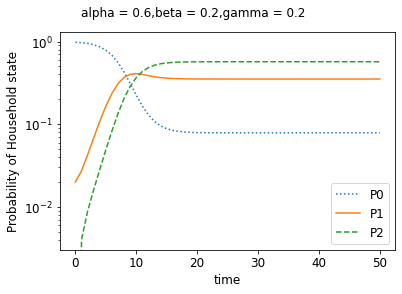

In [6]:
from scipy.integrate import solve_ivp
import numpy as np
import matplotlib.pyplot as plt
def odes(t, P):
    #constants
    # these values are taken from page 3 dyson et.al 
    alpha = 0.6
    beta = 0.2
    gamma = 0.2
    # assign each ODE to a vector element
    P0 = P[0]
    P1 = P[1]
    P2 = P[2]
    TI2 = P[3] # making expection rate as 4th vector with TI2 
    # define each ODE
    dP0dt = -alpha*(P1+2*P2)*P0 + gamma * P1
    dP1dt = alpha*(P1+2*P2)*P0 - (alpha/2*(P1+2*P2)+beta+gamma)*P1 + 2 * gamma * P2
    dP2dt = (alpha/2*(P1+2*P2)+beta)*P1 - 2 * gamma * P2
    dTI2dt = dP1dt + 2 * dP2dt
    #dexpIdt = alpha*(P1+2*P2)*P0+((alpha/2)*(P1+2*P2)+beta-gamma)*P1 - 2*gamma*P2
    return np.array([dP0dt,dP1dt,dP2dt,dTI2dt])
t_span = np.array([0,50])
times = np.linspace(t_span[0],t_span[1],51)
#intial conditions
Pi = np.array([0.98,0.02,0,0.01188])


sol = solve_ivp(odes,t_span,Pi,t_eval=times)
print(sol)
t = sol.t
P0 = sol.y[0]# y not P
P1 = sol.y[1]
P2 = sol.y[2]
TI2 = sol.y[3]

plt.rc("font",size=12)
plt.figure()
plt.text(1,2,'alpha = 0.6,beta = 0.2,gamma = 0.2', fontsize=12 )
plt.semilogy(t,P0,':', label = 'P0')
plt.semilogy(t,P1,'-', label = 'P1')
plt.semilogy(t,P2,'--', label = 'P2')
#plt.semilogy(t,TI2,'.', label = 'TI2')
plt.xlabel("time")
plt.ylabel("Probability of Household state")
plt.legend()
plt.savefig("031_g3.eps")

#plt.show()
output_timeline031_g3 = open("output_timeline031_g3.txt","w")

for i in range(len(t)):
    write_in = f"time: {t[i]}, P0: {P0[i]}, P1: {P1[i]}, P2: {P2[i]}, TI2: {TI2[i]}\n"
    output_timeline031_g3.write(write_in)
    #print(f"time: {t[i]}, P0: {P0[i]}, P1: {P1[i]}, P2: {P2[i]}, TI2: {TI2[i]}")
output_timeline031_g3.close()

In [11]:
alpha = 0.8
beta = 0.2
gamma = 0.2

P1 = 12/600
P2 = 0
P0 = 1-P1-P2
dP0dt = -alpha * ( P1 + 2 * P2 ) * P0 + gamma * P1 
dP1dt = alpha*(P1+2*P2)*P0 - ( ( alpha / 2 ) * ( P1 + 2 * P2 ) + beta + gamma ) * P1 + 2 * gamma * P2
dP2dt = ( ( alpha / 2 ) * ( P1 + 2 * P2 ) + beta ) * P1 - 2 * gamma * P2
TI2 = dP1dt + 2 * dP2dt
#dTI2dt = alpha*(P1+2*P2)*P0+((alpha/2)*(P1+2*P2)+beta-gamma)*P1 - 2*gamma*P2
print(P1)
print(P0)
print(dP0dt)
print(dP1dt)
print(dP2dt)
print(TI2)
print(f'{dP0dt},{dP1dt},{dP2dt},{TI2}')
print(f'{P0},{P1},{P2},{TI2}')

0.02
0.98
-0.01168
0.007519999999999999
0.0041600000000000005
0.01584
-0.01168,0.007519999999999999,0.0041600000000000005,0.01584
0.98,0.02,0,0.01584


  message: The solver successfully reached the end of the integration interval.
  success: True
   status: 0
        t: [ 0.000e+00  1.000e+00 ...  4.900e+01  5.000e+01]
        y: [[ 9.800e-01  9.618e-01 ...  4.816e-02  4.816e-02]
            [ 2.000e-02  3.365e-02 ...  3.074e-01  3.074e-01]
            [ 0.000e+00  4.591e-03 ...  6.445e-01  6.445e-01]
            [ 1.584e-02  3.867e-02 ...  1.592e+00  1.592e+00]]
      sol: None
 t_events: None
 y_events: None
     nfev: 218
     njev: 0
      nlu: 0


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


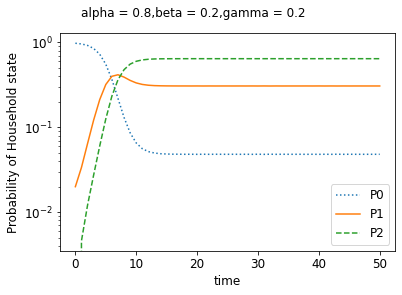

In [12]:
from scipy.integrate import solve_ivp
import numpy as np
import matplotlib.pyplot as plt
def odes(t, P):
    #constants
    # these values are taken from page 3 dyson et.al 
    alpha = 0.8
    beta = 0.2
    gamma = 0.2
    # assign each ODE to a vector element
    P0 = P[0]
    P1 = P[1]
    P2 = P[2]
    TI2 = P[3] # making expection rate as 4th vector with TI2 
    # define each ODE
    dP0dt = -alpha*(P1+2*P2)*P0 + gamma * P1
    dP1dt = alpha*(P1+2*P2)*P0 - (alpha/2*(P1+2*P2)+beta+gamma)*P1 + 2 * gamma * P2
    dP2dt = (alpha/2*(P1+2*P2)+beta)*P1 - 2 * gamma * P2
    dTI2dt = dP1dt + 2 * dP2dt
    #dexpIdt = alpha*(P1+2*P2)*P0+((alpha/2)*(P1+2*P2)+beta-gamma)*P1 - 2*gamma*P2
    return np.array([dP0dt,dP1dt,dP2dt,dTI2dt])
t_span = np.array([0,50])
times = np.linspace(t_span[0],t_span[1],51)
#intial conditions
Pi = np.array([0.98,0.02,0,0.01584])


sol = solve_ivp(odes,t_span,Pi,t_eval=times)
print(sol)
t = sol.t
P0 = sol.y[0]# y not P
P1 = sol.y[1]
P2 = sol.y[2]
TI2 = sol.y[3]

plt.rc("font",size=12)
plt.figure()
plt.text(1,2,'alpha = 0.8,beta = 0.2,gamma = 0.2', fontsize=12 )
plt.semilogy(t,P0,':', label = 'P0')
plt.semilogy(t,P1,'-', label = 'P1')
plt.semilogy(t,P2,'--', label = 'P2')
#plt.semilogy(t,TI2,'.', label = 'TI2')
plt.xlabel("time")
plt.ylabel("Probability of Household state")
plt.legend()
plt.savefig("041_g5.eps")

#plt.show()

output_timeline041_g5 = open("output_timeline041_g5.txt","w")

for i in range(len(t)):
    write_in = f"time: {t[i]}, P0: {P0[i]}, P1: {P1[i]}, P2: {P2[i]}, TI2: {TI2[i]}\n"
    output_timeline041_g5.write(write_in)
    #print(f"time: {t[i]}, P0: {P0[i]}, P1: {P1[i]}, P2: {P2[i]}, TI2: {TI2[i]}")

output_timeline041_g5.close()

In [13]:
alpha = 0.4
beta = 0.3
gamma = 0.2

P1 = 12/600
P2 = 0
P0 = 1-P1-P2
dP0dt = - alpha * ( P1 + 2 * P2 ) * P0 + gamma * P1 
dP1dt = alpha*(P1+2*P2)*P0 - ( ( alpha / 2 ) * ( P1 + 2 * P2 ) + beta + gamma ) * P1 + 2 * gamma * P2
dP2dt = ( ( alpha / 2 ) * ( P1 + 2 * P2 ) + beta ) * P1 - 2 * gamma * P2
TI2 = dP1dt + 2 * dP2dt
#dTI2dt = alpha*(P1+2*P2)*P0+((alpha/2)*(P1+2*P2)+beta-gamma)*P1 - 2*gamma*P2
print(P1)
print(P0)
print(dP0dt)
print(dP1dt)
print(dP2dt)
print(TI2)
print(f'{dP0dt},{dP1dt},{dP2dt},{TI2}')
print(f'{P0},{P1},{P2},{TI2}')

0.02
0.98
-0.0038399999999999997
-0.0022400000000000007
0.00608
0.00992
-0.0038399999999999997,-0.0022400000000000007,0.00608,0.00992
0.98,0.02,0,0.00992


  message: The solver successfully reached the end of the integration interval.
  success: True
   status: 0
        t: [ 0.000e+00  1.000e+00 ...  4.900e+01  5.000e+01]
        y: [[ 9.800e-01  9.741e-01 ...  1.288e-01  1.287e-01]
            [ 2.000e-02  2.086e-02 ...  3.564e-01  3.566e-01]
            [ 0.000e+00  5.026e-03 ...  5.149e-01  5.147e-01]
            [ 9.920e-03  2.083e-02 ...  1.376e+00  1.376e+00]]
      sol: None
 t_events: None
 y_events: None
     nfev: 164
     njev: 0
      nlu: 0


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


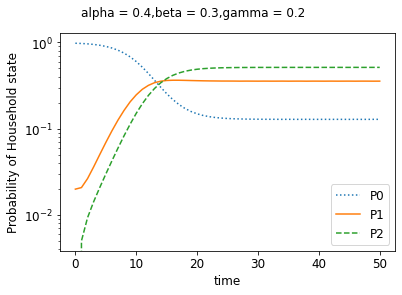

In [14]:
from scipy.integrate import solve_ivp
import numpy as np
import matplotlib.pyplot as plt
def odes(t, P):
    #constants
    # these values are taken from page 3 dyson et.al 
    alpha = 0.4
    beta = 0.3
    gamma = 0.2
    # assign each ODE to a vector element
    P0 = P[0]
    P1 = P[1]
    P2 = P[2]
    TI2 = P[3] # making expection rate as 4th vector with TI2 
    # define each ODE
    dP0dt = -alpha*(P1+2*P2)*P0 + gamma * P1
    dP1dt = alpha*(P1+2*P2)*P0 - (alpha/2*(P1+2*P2)+beta+gamma)*P1 + 2 * gamma * P2
    dP2dt = (alpha/2*(P1+2*P2)+beta)*P1 - 2 * gamma * P2
    dTI2dt = dP1dt + 2 * dP2dt
    #dexpIdt = alpha*(P1+2*P2)*P0+((alpha/2)*(P1+2*P2)+beta-gamma)*P1 - 2*gamma*P2
    return np.array([dP0dt,dP1dt,dP2dt,dTI2dt])
t_span = np.array([0,50])
times = np.linspace(t_span[0],t_span[1],51)
#intial conditions
Pi = np.array([0.98,0.02,0,0.00992])


sol = solve_ivp(odes,t_span,Pi,t_eval=times)
print(sol)
t = sol.t
P0 = sol.y[0]# y not P
P1 = sol.y[1]
P2 = sol.y[2]
TI2 = sol.y[3]

plt.rc("font",size=12)
plt.figure()
plt.text(1,2,'alpha = 0.4,beta = 0.3,gamma = 0.2', fontsize=12 )
plt.semilogy(t,P0,':', label = 'P0')
plt.semilogy(t,P1,'-', label = 'P1')
plt.semilogy(t,P2,'--', label = 'P2')
#plt.semilogy(t,TI2,'.', label = 'TI2')
plt.xlabel("time")
plt.ylabel("Probability of Household state")
plt.legend()
plt.savefig("022_g6.eps")

#plt.show()

output_timeline022_g6 = open("output_timeline022_g6.txt","w")

for i in range(len(t)):
    write_in = f"time: {t[i]}, P0: {P0[i]}, P1: {P1[i]}, P2: {P2[i]}, TI2: {TI2[i]}\n"
    output_timeline022_g6.write(write_in)
    #print(f"time: {t[i]}, P0: {P0[i]}, P1: {P1[i]}, P2: {P2[i]}, TI2: {TI2[i]}")

output_timeline022_g6.close()

In [15]:
alpha = 0.4
gamma = 0.2
beta = 0.4

P1 = 12/600
P2 = 0
P0 = 1-P1-P2
dP0dt = -alpha * ( P1 + 2 * P2 ) * P0 + gamma * P1 
dP1dt = alpha*(P1+2*P2)*P0 - ( ( alpha / 2 ) * ( P1 + 2 * P2 ) + beta + gamma ) * P1 + 2 * gamma * P2
dP2dt = ( ( alpha / 2 ) * ( P1 + 2 * P2 ) + beta ) * P1 - 2 * gamma * P2
TI2 = dP1dt + 2 * dP2dt
#dTI2dt = alpha*(P1+2*P2)*P0+((alpha/2)*(P1+2*P2)+beta-gamma)*P1 - 2*gamma*P2
print(P1)
print(P0)
print(dP0dt)
print(dP1dt)
print(dP2dt)
print(TI2)
print(f'{dP0dt},{dP1dt},{dP2dt},{TI2}')
print(f'{P0},{P1},{P2},{TI2}')

0.02
0.98
-0.0038399999999999997
-0.0042400000000000024
0.00808
0.011919999999999998
-0.0038399999999999997,-0.0042400000000000024,0.00808,0.011919999999999998
0.98,0.02,0,0.011919999999999998


  message: The solver successfully reached the end of the integration interval.
  success: True
   status: 0
        t: [ 0.000e+00  1.000e+00 ...  4.900e+01  5.000e+01]
        y: [[ 9.800e-01  9.736e-01 ...  1.124e-01  1.124e-01]
            [ 2.000e-02  1.992e-02 ...  3.256e-01  3.256e-01]
            [ 0.000e+00  6.461e-03 ...  5.620e-01  5.619e-01]
            [ 1.192e-02  2.476e-02 ...  1.441e+00  1.441e+00]]
      sol: None
 t_events: None
 y_events: None
     nfev: 188
     njev: 0
      nlu: 0


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


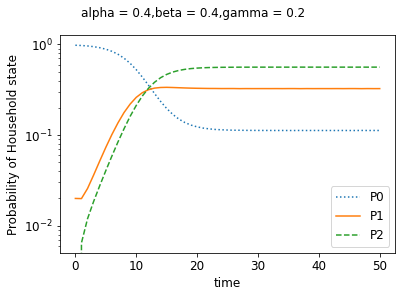

In [16]:
from scipy.integrate import solve_ivp
import numpy as np
import matplotlib.pyplot as plt
def odes(t, P):
    #constants
    # these values are taken from page 3 dyson et.al 
    alpha = 0.4
    beta = 0.4
    gamma = 0.2
    # assign each ODE to a vector element
    P0 = P[0]
    P1 = P[1]
    P2 = P[2]
    TI2 = P[3] # making expection rate as 4th vector with TI2 
    # define each ODE
    dP0dt = -alpha*(P1+2*P2)*P0 + gamma * P1
    dP1dt = alpha*(P1+2*P2)*P0 - (alpha/2*(P1+2*P2)+beta+gamma)*P1 + 2 * gamma * P2
    dP2dt = (alpha/2*(P1+2*P2)+beta)*P1 - 2 * gamma * P2
    dTI2dt = dP1dt + 2 * dP2dt
    #dexpIdt = alpha*(P1+2*P2)*P0+((alpha/2)*(P1+2*P2)+beta-gamma)*P1 - 2*gamma*P2
    return np.array([dP0dt,dP1dt,dP2dt,dTI2dt])
t_span = np.array([0,50])
times = np.linspace(t_span[0],t_span[1],51)
#intial conditions
Pi = np.array([0.98,0.02,0,0.011919999999999998])


sol = solve_ivp(odes,t_span,Pi,t_eval=times)
print(sol)
t = sol.t
P0 = sol.y[0]# y not P
P1 = sol.y[1]
P2 = sol.y[2]
TI2 = sol.y[3]

plt.rc("font",size=12)
plt.figure()
plt.text(1,2,'alpha = 0.4,beta = 0.4,gamma = 0.2', fontsize=12 )
plt.semilogy(t,P0,':', label = 'P0')
plt.semilogy(t,P1,'-', label = 'P1')
plt.semilogy(t,P2,'--', label = 'P2')
#plt.semilogy(t,TI2,'.', label = 'TI2')
plt.xlabel("time")
plt.ylabel("Probability of Household state")
plt.legend()
plt.savefig("032_g11.eps")

#plt.show()

output_timeline032_g11 = open("output_timeline032_g11.txt","w")

for i in range(len(t)):
    write_in = f"time: {t[i]}, P0: {P0[i]}, P1: {P1[i]}, P2: {P2[i]}, TI2: {TI2[i]}\n"
    output_timeline032_g11.write(write_in)
    #print(f"time: {t[i]}, P0: {P0[i]}, P1: {P1[i]}, P2: {P2[i]}, TI2: {TI2[i]}")

output_timeline032_g11.close()

In [17]:
alpha = 0.4
beta = 0.5
gamma = 0.2

P1 = 12/600
P2 = 0
P0 = 1-P1-P2
dP0dt = -alpha * ( P1 + 2 * P2 ) * P0 + gamma * P1 
dP1dt = alpha*(P1+2*P2)*P0 - ( ( alpha / 2 ) * ( P1 + 2 * P2 ) + beta + gamma ) * P1 + 2 * gamma * P2
dP2dt = ( ( alpha / 2 ) * ( P1 + 2 * P2 ) + beta ) * P1 - 2 * gamma * P2
TI2 = dP1dt + 2 * dP2dt
#dTI2dt = alpha*(P1+2*P2)*P0+((alpha/2)*(P1+2*P2)+beta-gamma)*P1 - 2*gamma*P2
print(P1)
print(P0)
print(dP0dt)
print(dP1dt)
print(dP2dt)
print(TI2)
print(f'{dP0dt},{dP1dt},{dP2dt},{TI2}')
print(f'{P0},{P1},{P2},{TI2}')

0.02
0.98
-0.0038399999999999997
-0.006239999999999999
0.01008
0.013920000000000002
-0.0038399999999999997,-0.006239999999999999,0.01008,0.013920000000000002
0.98,0.02,0,0.013920000000000002


  message: The solver successfully reached the end of the integration interval.
  success: True
   status: 0
        t: [ 0.000e+00  1.000e+00 ...  4.900e+01  5.000e+01]
        y: [[ 9.800e-01  9.732e-01 ...  9.998e-02  1.001e-01]
            [ 2.000e-02  1.905e-02 ...  3.001e-01  2.998e-01]
            [ 0.000e+00  7.804e-03 ...  5.999e-01  6.001e-01]
            [ 1.392e-02  2.857e-02 ...  1.494e+00  1.494e+00]]
      sol: None
 t_events: None
 y_events: None
     nfev: 194
     njev: 0
      nlu: 0


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


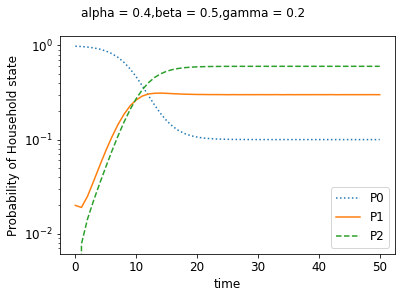

In [18]:
from scipy.integrate import solve_ivp
import numpy as np
import matplotlib.pyplot as plt
def odes(t, P):
    #constants
    # these values are taken from page 3 dyson et.al 
    alpha = 0.4
    beta = 0.5
    gamma = 0.2
    # assign each ODE to a vector element
    P0 = P[0]
    P1 = P[1]
    P2 = P[2]
    TI2 = P[3] # making expection rate as 4th vector with TI2 
    # define each ODE
    dP0dt = -alpha*(P1+2*P2)*P0 + gamma * P1
    dP1dt = alpha*(P1+2*P2)*P0 - (alpha/2*(P1+2*P2)+beta+gamma)*P1 + 2 * gamma * P2
    dP2dt = (alpha/2*(P1+2*P2)+beta)*P1 - 2 * gamma * P2
    dTI2dt = dP1dt + 2 * dP2dt
    #dexpIdt = alpha*(P1+2*P2)*P0+((alpha/2)*(P1+2*P2)+beta-gamma)*P1 - 2*gamma*P2
    return np.array([dP0dt,dP1dt,dP2dt,dTI2dt])
t_span = np.array([0,50])
times = np.linspace(t_span[0],t_span[1],51)
#intial conditions
Pi = np.array([0.98,0.02,0,0.013920000000000002])


sol = solve_ivp(odes,t_span,Pi,t_eval=times)
print(sol)
t = sol.t
P0 = sol.y[0]# y not P
P1 = sol.y[1]
P2 = sol.y[2]
TI2 = sol.y[3]

plt.rc("font",size=12)
plt.figure()
plt.text(1,2,'alpha = 0.4,beta = 0.5,gamma = 0.2', fontsize=12 )
plt.semilogy(t,P0,':', label = 'P0')
plt.semilogy(t,P1,'-', label = 'P1')
plt.semilogy(t,P2,'--', label = 'P2')
#plt.semilogy(t,TI2,'.', label = 'TI2')
plt.xlabel("time")
plt.ylabel("Probability of Household state")
plt.legend()
plt.savefig("042_g16.eps")

#plt.show()

output_timeline042_g16 = open("output_timeline042_g16.txt","w")

for i in range(len(t)):
    write_in = f"time: {t[i]}, P0: {P0[i]}, P1: {P1[i]}, P2: {P2[i]}, TI2: {TI2[i]}\n"
    output_timeline042_g16.write(write_in)
    #print(f"time: {t[i]}, P0: {P0[i]}, P1: {P1[i]}, P2: {P2[i]}, TI2: {TI2[i]}")

output_timeline042_g16.close()

In [19]:
alpha = 0.4
beta = 0.2
gamma = 0.3

P1 = 12/600
P2 = 0
P0 = 1-P1-P2
dP0dt = -alpha * ( P1 + 2 * P2 ) * P0 + gamma * P1 
dP1dt = alpha*(P1+2*P2)*P0 - ( ( alpha / 2 ) * ( P1 + 2 * P2 ) + beta + gamma ) * P1 + 2 * gamma * P2
dP2dt = ( ( alpha / 2 ) * ( P1 + 2 * P2 ) + beta ) * P1 - 2 * gamma * P2
TI2 = dP1dt + 2 * dP2dt
#dTI2dt = alpha*(P1+2*P2)*P0+((alpha/2)*(P1+2*P2)+beta-gamma)*P1 - 2*gamma*P2
print(P1)
print(P0)
print(dP0dt)
print(dP1dt)
print(dP2dt)
print(TI2)
print(f'{dP0dt},{dP1dt},{dP2dt},{TI2}')
print(f'{P0},{P1},{P2},{TI2}')

0.02
0.98
-0.0018399999999999996
-0.0022400000000000007
0.00408
0.00592
-0.0018399999999999996,-0.0022400000000000007,0.00408,0.00592
0.98,0.02,0,0.00592


  message: The solver successfully reached the end of the integration interval.
  success: True
   status: 0
        t: [ 0.000e+00  1.000e+00 ...  5.900e+01  6.000e+01]
        y: [[ 9.800e-01  9.769e-01 ...  3.275e-01  3.274e-01]
            [ 2.000e-02  2.007e-02 ...  4.086e-01  4.086e-01]
            [ 0.000e+00  3.032e-03 ...  2.640e-01  2.639e-01]
            [ 5.920e-03  1.205e-02 ...  9.224e-01  9.224e-01]]
      sol: None
 t_events: None
 y_events: None
     nfev: 170
     njev: 0
      nlu: 0


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


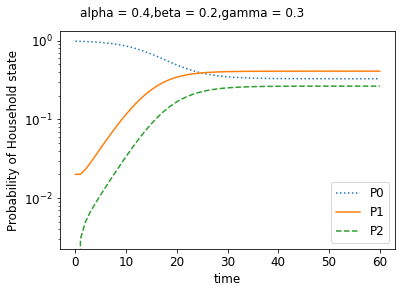

In [20]:
from scipy.integrate import solve_ivp
import numpy as np
import matplotlib.pyplot as plt
def odes(t, P):
    #constants
    # these values are taken from page 3 dyson et.al 
    alpha = 0.4
    beta = 0.2
    gamma = 0.3
    # assign each ODE to a vector element
    P0 = P[0]
    P1 = P[1]
    P2 = P[2]
    TI2 = P[3] # making expection rate as 4th vector with TI2 
    # define each ODE
    dP0dt = -alpha*(P1+2*P2)*P0 + gamma * P1
    dP1dt = alpha*(P1+2*P2)*P0 - (alpha/2*(P1+2*P2)+beta+gamma)*P1 + 2 * gamma * P2
    dP2dt = (alpha/2*(P1+2*P2)+beta)*P1 - 2 * gamma * P2
    dTI2dt = dP1dt + 2 * dP2dt
    #dexpIdt = alpha*(P1+2*P2)*P0+((alpha/2)*(P1+2*P2)+beta-gamma)*P1 - 2*gamma*P2
    return np.array([dP0dt,dP1dt,dP2dt,dTI2dt])
t_span = np.array([0,60])
times = np.linspace(t_span[0],t_span[1],61)
#intial conditions
Pi = np.array([0.98,0.02,0,0.00592])

sol = solve_ivp(odes,t_span,Pi,t_eval=times)
print(sol)
t = sol.t
P0 = sol.y[0]# y not P
P1 = sol.y[1]
P2 = sol.y[2]
TI2 = sol.y[3]

plt.rc("font",size=12)
plt.figure()
plt.text(1,2,'alpha = 0.4,beta = 0.2,gamma = 0.3', fontsize=12 )
plt.semilogy(t,P0,':', label = 'P0')
plt.semilogy(t,P1,'-', label = 'P1')
plt.semilogy(t,P2,'--', label = 'P2')
#plt.semilogy(t,TI2,'.', label = 'TI2')
plt.xlabel("time")
plt.ylabel("Probability of Household state")
plt.legend()
plt.savefig("023_b6.eps")

#plt.show()

output_timeline023_b6 = open("output_timeline023_b6.txt","w")

for i in range(len(t)):
    write_in = f"time: {t[i]}, P0: {P0[i]}, P1: {P1[i]}, P2: {P2[i]}, TI2: {TI2[i]}\n"
    output_timeline023_b6.write(write_in)
    #print(f"time: {t[i]}, P0: {P0[i]}, P1: {P1[i]}, P2: {P2[i]}, TI2: {TI2[i]}")
output_timeline023_b6.close()

In [21]:
alpha = 0.4
gamma = 0.4
beta = 0.2

P1 = 12/600
P2 = 0
P0 = 1-P1-P2
dP0dt = - alpha*(P1+2*P2)*P0 + gamma * P1 
dP1dt = alpha*(P1+2*P2)*P0 - ((alpha/2)*(P1+2*P2)+beta+gamma)*P1 + 2 * gamma * P2
dP2dt = ((alpha/2)*(P1+2*P2)+beta)*P1 - 2 * gamma * P2
TI2 = dP1dt + 2 * dP2dt
#dTI2dt = alpha*(P1+2*P2)*P0+((alpha/2)*(P1+2*P2)+beta-gamma)*P1 - 2*gamma*P2
print(P1)
print(P0)
print(dP0dt)
print(dP1dt)
print(dP2dt)
print(TI2)
print(f'{dP0dt},{dP1dt},{dP2dt},{TI2}')
print(f'{P0},{P1},{P2},{TI2}')

0.02
0.98
0.00016000000000000042
-0.0042400000000000024
0.00408
0.003919999999999998
0.00016000000000000042,-0.0042400000000000024,0.00408,0.003919999999999998
0.98,0.02,0,0.003919999999999998


  message: The solver successfully reached the end of the integration interval.
  success: True
   status: 0
        t: [ 0.000e+00  1.000e+00 ...  9.900e+01  1.000e+02]
        y: [[ 9.800e-01  9.790e-01 ...  5.616e-01  5.616e-01]
            [ 2.000e-02  1.840e-02 ...  3.154e-01  3.151e-01]
            [ 0.000e+00  2.636e-03 ...  1.231e-01  1.232e-01]
            [ 3.920e-03  7.591e-03 ...  5.455e-01  5.455e-01]]
      sol: None
 t_events: None
 y_events: None
     nfev: 272
     njev: 0
      nlu: 0


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


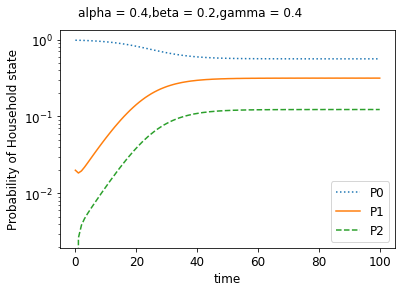

In [22]:
3# fig 2 pg 3 Dyson et al.(2017)
# In (1200 persons) 600household, 12 households with one infected, 0  with 2 infected , all are zero infected is rest = 
from scipy.integrate import solve_ivp
import numpy as np
import matplotlib.pyplot as plt
def odes(t, P):
    #constants
    # these values are taken from page 3 dyson et.al 
    alpha = 0.4
    beta = 0.2
    gamma = 0.4
    # assign each ODE to a vector element
    P0 = P[0]
    P1 = P[1]
    P2 = P[2]
    TI2 = P[3] # making expection rate as 4th vector with TI2 
    # define each ODE
    dP0dt = -alpha*(P1+2*P2)*P0 + gamma * P1
    dP1dt = alpha*(P1+2*P2)*P0 - ((alpha/2)*(P1+2*P2)+beta+gamma)*P1 + 2 * gamma * P2
    dP2dt = ((alpha/2)*(P1+2*P2)+beta)*P1 - 2 * gamma * P2
    dTI2dt = dP1dt + 2 * dP2dt
    #dexpIdt = alpha*(P1+2*P2)*P0+((alpha/2)*(P1+2*P2)+beta-gamma)*P1 - 2*gamma*P2
    return np.array([dP0dt,dP1dt,dP2dt,dTI2dt])
t_span = np.array([0,100])
times = np.linspace(t_span[0],t_span[1],101)
#intial conditions
Pi = np.array([0.98,0.02,0,0.003919999999999998])


sol = solve_ivp(odes,t_span,Pi,t_eval=times)
print(sol)
t = sol.t
P0 = sol.y[0]# y not P
P1 = sol.y[1]
P2 = sol.y[2]
TI2 = sol.y[3]

plt.rc("font",size=12)
plt.figure()
plt.text(1,2,'alpha = 0.4,beta = 0.2,gamma = 0.4', fontsize=12 )
plt.semilogy(t,P0,':', label = 'P0')
plt.semilogy(t,P1,'-', label = 'P1')
plt.semilogy(t,P2,'--', label = 'P2')
#plt.semilogy(t,TI2,'.', label = 'TI2')
plt.xlabel("time")
plt.ylabel("Probability of Household state")
plt.legend()
plt.savefig("033_a1.eps")

#plt.show()

output_timeline033_a1 = open("output_timeline033_a1.txt","w")

for i in range(len(t)):
    write_in = f"time: {t[i]}, P0: {P0[i]}, P1: {P1[i]}, P2: {P2[i]}, TI2: {TI2[i]}\n"
    output_timeline033_a1.write(write_in)
    #print(f"time: {t[i]}, P0: {P0[i]}, P1: {P1[i]}, P2: {P2[i]}, TI2: {TI2[i]}")

output_timeline033_a1.close()

In [23]:
alpha = 0.4
gamma = 0.5411
beta = 0.2

P1 = 12/600
P2 = 0
P0 = 1-P1-P2
dP0dt = -alpha * ( P1 + 2 * P2 ) * P0 + gamma * P1 
dP1dt = alpha*(P1+2*P2)*P0 - ( ( alpha / 2 ) * ( P1 + 2 * P2 ) + beta + gamma ) * P1 + 2 * gamma * P2
dP2dt = ( ( alpha / 2 ) * ( P1 + 2 * P2 ) + beta ) * P1 - 2 * gamma * P2
TI2 = dP1dt + 2 * dP2dt
#dTI2dt = alpha*(P1+2*P2)*P0+((alpha/2)*(P1+2*P2)+beta-gamma)*P1 - 2*gamma*P2
print(P1)
print(P0)
print(dP0dt)
print(dP1dt)
print(dP2dt)
print(TI2)
print(f'{dP0dt},{dP1dt},{dP2dt},{TI2}')
print(f'{P0},{P1},{P2},{TI2}')

0.02
0.98
0.0029820000000000003
-0.007062000000000002
0.00408
0.0010979999999999983
0.0029820000000000003,-0.007062000000000002,0.00408,0.0010979999999999983
0.98,0.02,0,0.0010979999999999983


  message: The solver successfully reached the end of the integration interval.
  success: True
   status: 0
        t: [ 0.000e+00  1.000e+00 ...  2.590e+02  2.600e+02]
        y: [[ 9.800e-01  9.816e-01 ...  9.822e-01  9.822e-01]
            [ 2.000e-02  1.625e-02 ...  1.499e-02  1.499e-02]
            [ 0.000e+00  2.167e-03 ...  2.823e-03  2.826e-03]
            [ 1.098e-03  1.681e-03 ...  1.737e-03  1.738e-03]]
      sol: None
 t_events: None
 y_events: None
     nfev: 812
     njev: 0
      nlu: 0


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


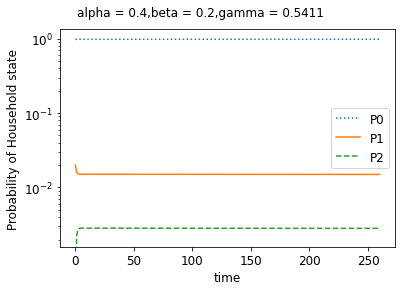

In [29]:
from scipy.integrate import solve_ivp
import numpy as np
import matplotlib.pyplot as plt
def odes(t, P):
    #constants
    # these values are taken from page 3 dyson et.al 
    alpha = 0.4
    beta = 0.2
    gamma = 0.5411
    # assign each ODE to a vector element
    P0 = P[0]
    P1 = P[1]
    P2 = P[2]
    TI2 = P[3] # making expection rate as 4th vector with TI2 
    # define each ODE
    dP0dt = -alpha*(P1+2*P2)*P0 + gamma * P1
    dP1dt = alpha*(P1+2*P2)*P0 - (alpha/2*(P1+2*P2)+beta+gamma)*P1 + 2 * gamma * P2
    dP2dt = (alpha/2*(P1+2*P2)+beta)*P1 - 2 * gamma * P2
    dTI2dt = dP1dt + 2 * dP2dt
    #dexpIdt = alpha*(P1+2*P2)*P0+((alpha/2)*(P1+2*P2)+beta-gamma)*P1 - 2*gamma*P2
    return np.array([dP0dt,dP1dt,dP2dt,dTI2dt])
t_span = np.array([0,260])
times = np.linspace(t_span[0],t_span[1],261)
#intial conditions
Pi = np.array([0.98,0.02,0,0.0010979999999999983])

sol = solve_ivp(odes,t_span,Pi,t_eval=times)
print(sol)
t = sol.t
P0 = sol.y[0]# y not P
P1 = sol.y[1]
P2 = sol.y[2]
TI2 = sol.y[3]

plt.rc("font",size=12)
plt.figure()
plt.text(1,2,'alpha = 0.4,beta = 0.2,gamma = 0.5411', fontsize=12 )
plt.semilogy(t,P0,':', label = 'P0')
plt.semilogy(t,P1,'-', label = 'P1')
plt.semilogy(t,P2,'--', label = 'P2')
#plt.semilogy(t,TI2,'.', label = 'TI2')
plt.xlabel("time")
plt.ylabel("Probability of Household state")
plt.legend()
plt.savefig("033_a2_5411.eps")

#plt.show()
output_timeline033_a2_5411 = open("output_timeline033_a2_5411.txt","w")

for i in range(len(t)):
    write_in = f"time: {t[i]}, P0: {P0[i]}, P1: {P1[i]}, P2: {P2[i]}, TI2: {TI2[i]}\n"
    output_timeline033_a2_5411.write(write_in)
    #print(f"time: {t[i]}, P0: {P0[i]}, P1: {P1[i]}, P2: {P2[i]}, TI2: {TI2[i]}")

output_timeline033_a2_5411.close()

In [1]:
alpha = 0.4
gamma = 0.5
beta = 0.2

P1 = 12/600
P2 = 0
P0 = 1-P1-P2
dP0dt = -alpha * ( P1 + 2 * P2 ) * P0 + gamma * P1 
dP1dt = alpha*(P1+2*P2)*P0 - ( ( alpha / 2 ) * ( P1 + 2 * P2 ) + beta + gamma ) * P1 + 2 * gamma * P2
dP2dt = ( ( alpha / 2 ) * ( P1 + 2 * P2 ) + beta ) * P1 - 2 * gamma * P2
TI2 = dP1dt + 2 * dP2dt
#dTI2dt = alpha*(P1+2*P2)*P0+((alpha/2)*(P1+2*P2)+beta-gamma)*P1 - 2*gamma*P2
print(P1)
print(P0)
print(dP0dt)
print(dP1dt)
print(dP2dt)
print(TI2)
print(f'{dP0dt},{dP1dt},{dP2dt},{TI2}')
print(f'{P0},{P1},{P2},{TI2}')

0.02
0.98
0.0021600000000000005
-0.006239999999999999
0.00408
0.0019200000000000016
0.0021600000000000005,-0.006239999999999999,0.00408,0.0019200000000000016
0.98,0.02,0,0.0019200000000000016


  message: The solver successfully reached the end of the integration interval.
  success: True
   status: 0
        t: [ 0.000e+00  1.000e+00 ...  2.590e+02  2.600e+02]
        y: [[ 9.800e-01  9.809e-01 ...  8.493e-01  8.493e-01]
            [ 2.000e-02  1.685e-02 ...  1.219e-01  1.219e-01]
            [ 0.000e+00  2.294e-03 ...  2.875e-02  2.876e-02]
            [ 1.920e-03  3.358e-03 ...  1.614e-01  1.614e-01]]
      sol: None
 t_events: None
 y_events: None
     nfev: 794
     njev: 0
      nlu: 0


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


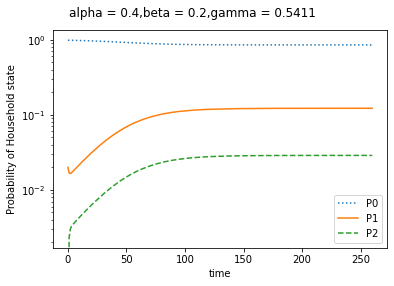

In [2]:
from scipy.integrate import solve_ivp
import numpy as np
import matplotlib.pyplot as plt
def odes(t, P):
    #constants
    # these values are taken from page 3 dyson et.al 
    alpha = 0.4
    beta = 0.2
    gamma = 0.5
    # assign each ODE to a vector element
    P0 = P[0]
    P1 = P[1]
    P2 = P[2]
    TI2 = P[3] # making expection rate as 4th vector with TI2 
    # define each ODE
    dP0dt = -alpha*(P1+2*P2)*P0 + gamma * P1
    dP1dt = alpha*(P1+2*P2)*P0 - (alpha/2*(P1+2*P2)+beta+gamma)*P1 + 2 * gamma * P2
    dP2dt = (alpha/2*(P1+2*P2)+beta)*P1 - 2 * gamma * P2
    dTI2dt = dP1dt + 2 * dP2dt
    #dexpIdt = alpha*(P1+2*P2)*P0+((alpha/2)*(P1+2*P2)+beta-gamma)*P1 - 2*gamma*P2
    return np.array([dP0dt,dP1dt,dP2dt,dTI2dt])
t_span = np.array([0,260])
times = np.linspace(t_span[0],t_span[1],261)
#intial conditions
Pi = np.array([0.98,0.02,0,0.0019200000000000016])

sol = solve_ivp(odes,t_span,Pi,t_eval=times)
print(sol)
t = sol.t
P0 = sol.y[0]# y not P
P1 = sol.y[1]
P2 = sol.y[2]
TI2 = sol.y[3]

plt.rc("font",size=12)
plt.figure()
plt.text(1,2,'alpha = 0.4,beta = 0.2,gamma = 0.5411', fontsize=12 )
plt.semilogy(t,P0,':', label = 'P0')
plt.semilogy(t,P1,'-', label = 'P1')
plt.semilogy(t,P2,'--', label = 'P2')
#plt.semilogy(t,TI2,'.', label = 'TI2')
plt.xlabel("time")
plt.ylabel("Probability of Household state")
plt.legend()
plt.savefig("033_a2_5.eps")

#plt.show()
output_timeline033_a2_5 = open("output_timeline033_a2_5.txt","w")

for i in range(len(t)):
    write_in = f"time: {t[i]}, P0: {P0[i]}, P1: {P1[i]}, P2: {P2[i]}, TI2: {TI2[i]}\n"
    output_timeline033_a2_5.write(write_in)
    #print(f"time: {t[i]}, P0: {P0[i]}, P1: {P1[i]}, P2: {P2[i]}, TI2: {TI2[i]}")

output_timeline033_a2_5.close()

In [25]:
alpha = 0.4
gamma = 0.6
beta = 0.2

P1 = 12/600
P2 = 0
P0 = 1-P1-P2
dP0dt = -alpha * ( P1 + 2 * P2 ) * P0 + gamma * P1 
dP1dt = alpha*(P1+2*P2)*P0 - ( ( alpha / 2 ) * ( P1 + 2 * P2 ) + beta + gamma ) * P1 + 2 * gamma * P2
dP2dt = ( ( alpha / 2 ) * ( P1 + 2 * P2 ) + beta ) * P1 - 2 * gamma * P2
TI2 = dP1dt + 2 * dP2dt
#dTI2dt = alpha*(P1+2*P2)*P0+((alpha/2)*(P1+2*P2)+beta-gamma)*P1 - 2*gamma*P2
print(P1)
print(P0)
print(dP0dt)
print(dP1dt)
print(dP2dt)
print(TI2)
print(f'{dP0dt},{dP1dt},{dP2dt},{TI2}')
print(f'{P0},{P1},{P2},{TI2}')

0.02
0.98
0.0041600000000000005
-0.00824
0.00408
-8.000000000000021e-05
0.0041600000000000005,-0.00824,0.00408,-8.000000000000021e-05
0.98,0.02,0,-8.000000000000021e-05


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


  message: The solver successfully reached the end of the integration interval.
  success: True
   status: 0
        t: [ 0.000e+00  1.000e+00 ...  1.740e+02  1.750e+02]
        y: [[ 9.800e-01  9.826e-01 ...  1.000e+00  1.000e+00]
            [ 2.000e-02  1.542e-02 ...  1.645e-06  2.310e-06]
            [ 0.000e+00  1.998e-03 ...  3.580e-07 -8.944e-08]
            [-8.000e-05 -6.644e-04 ... -2.008e-02 -2.008e-02]]
      sol: None
 t_events: None
 y_events: None
     nfev: 608
     njev: 0
      nlu: 0


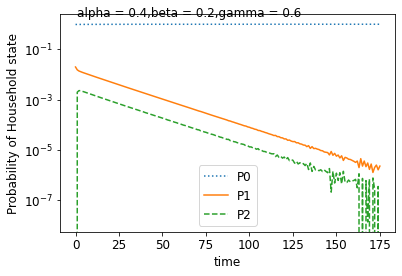

In [26]:
from scipy.integrate import solve_ivp
import numpy as np
import matplotlib.pyplot as plt
def odes(t, P):
    #constants
    # these values are taken from page 3 dyson et.al 
    alpha = 0.4
    beta = 0.2
    gamma = 0.6
    # assign each ODE to a vector element
    P0 = P[0]
    P1 = P[1]
    P2 = P[2]
    TI2 = P[3] # making expection rate as 4th vector with TI2 
    # define each ODE
    dP0dt = -alpha*(P1+2*P2)*P0 + gamma * P1
    dP1dt = alpha*(P1+2*P2)*P0 - (alpha/2*(P1+2*P2)+beta+gamma)*P1 + 2 * gamma * P2
    dP2dt = (alpha/2*(P1+2*P2)+beta)*P1 - 2 * gamma * P2
    dTI2dt = dP1dt + 2 * dP2dt
    #dexpIdt = alpha*(P1+2*P2)*P0+((alpha/2)*(P1+2*P2)+beta-gamma)*P1 - 2*gamma*P2
    return np.array([dP0dt,dP1dt,dP2dt,dTI2dt])
t_span = np.array([0,175])
times = np.linspace(t_span[0],t_span[1],176)
#intial conditions
Pi = np.array([0.98,0.02,0,-8.000000000000021e-05])


sol = solve_ivp(odes,t_span,Pi,t_eval=times)
print(sol)
t = sol.t
P0 = sol.y[0]# y not P
P1 = sol.y[1]
P2 = sol.y[2]
TI2 = sol.y[3]

plt.rc("font",size=12)
plt.figure()
plt.text(1,2,'alpha = 0.4,beta = 0.2,gamma = 0.6', fontsize=12 )
plt.semilogy(t,P0,':', label = 'P0')
plt.semilogy(t,P1,'-', label = 'P1')
plt.semilogy(t,P2,'--', label = 'P2')
#plt.semilogy(t,TI2,'.', label = 'TI2')
plt.xlabel("time")
plt.ylabel("Probability of Household state")
plt.legend()
plt.savefig("043_a3.eps")

#plt.show()

output_timeline043_a3 = open("output_timeline043_a3.txt","w")

for i in range(len(t)):
    write_in = f"time: {t[i]}, P0: {P0[i]}, P1: {P1[i]}, P2: {P2[i]}, TI2: {TI2[i]}\n"
    output_timeline043_a3.write(write_in)
    #print(f"time: {t[i]}, P0: {P0[i]}, P1: {P1[i]}, P2: {P2[i]}, TI2: {TI2[i]}")

output_timeline043_a3.close()

In [27]:
alpha = 0.4
gamma = 0.8
beta = 0.2

P1 = 12/600
P2 = 0
P0 = 1-P1-P2
dP0dt = -alpha * ( P1 + 2 * P2 ) * P0 + gamma * P1 
dP1dt = alpha*(P1+2*P2)*P0 - ( ( alpha / 2 ) * ( P1 + 2 * P2 ) + beta + gamma ) * P1 + 2 * gamma * P2
dP2dt = ( ( alpha / 2 ) * ( P1 + 2 * P2 ) + beta ) * P1 - 2 * gamma * P2
TI2 = dP1dt + 2 * dP2dt
#dTI2dt = alpha*(P1+2*P2)*P0+((alpha/2)*(P1+2*P2)+beta-gamma)*P1 - 2*gamma*P2
print(P1)
print(P0)
print(dP0dt)
print(dP1dt)
print(dP2dt)
print(TI2)
print(f'{dP0dt},{dP1dt},{dP2dt},{TI2}')
print(f'{P0},{P1},{P2},{TI2}')

0.02
0.98
0.00816
-0.012240000000000001
0.00408
-0.00408
0.00816,-0.012240000000000001,0.00408,-0.00408
0.98,0.02,0,-0.00408


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


  message: The solver successfully reached the end of the integration interval.
  success: True
   status: 0
        t: [ 0.000e+00  1.000e+00 ...  4.900e+01  5.000e+01]
        y: [[ 9.800e-01  9.856e-01 ...  1.000e+00  1.000e+00]
            [ 2.000e-02  1.289e-02 ...  6.199e-07  2.348e-07]
            [ 0.000e+00  1.517e-03 ... -2.841e-07 -8.111e-08]
            [-4.080e-03 -8.158e-03 ... -2.408e-02 -2.408e-02]]
      sol: None
 t_events: None
 y_events: None
     nfev: 224
     njev: 0
      nlu: 0


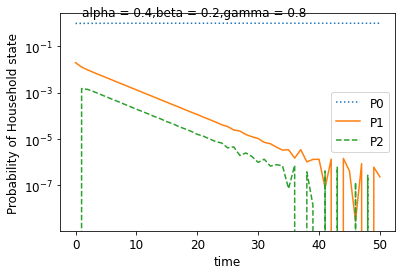

In [28]:
from scipy.integrate import solve_ivp
import numpy as np
import matplotlib.pyplot as plt
def odes(t, P):
    #constants
    # these values are taken from page 3 dyson et.al 
    alpha = 0.4
    beta = 0.2
    gamma = 0.8
    # assign each ODE to a vector element
    P0 = P[0]
    P1 = P[1]
    P2 = P[2]
    TI2 = P[3] # making expection rate as 4th vector with TI2 
    # define each ODE
    dP0dt = -alpha*(P1+2*P2)*P0 + gamma * P1
    dP1dt = alpha*(P1+2*P2)*P0 - (alpha/2*(P1+2*P2)+beta+gamma)*P1 + 2 * gamma * P2
    dP2dt = (alpha/2*(P1+2*P2)+beta)*P1 - 2 * gamma * P2
    dTI2dt = dP1dt + 2 * dP2dt
    #dexpIdt = alpha*(P1+2*P2)*P0+((alpha/2)*(P1+2*P2)+beta-gamma)*P1 - 2*gamma*P2
    return np.array([dP0dt,dP1dt,dP2dt,dTI2dt])
t_span = np.array([0,50])
times = np.linspace(t_span[0],t_span[1],51)
#intial conditions
Pi = np.array([0.98,0.02,0,-0.00408])


sol = solve_ivp(odes,t_span,Pi,t_eval=times)
print(sol)
t = sol.t
P0 = sol.y[0]# y not P
P1 = sol.y[1]
P2 = sol.y[2]
TI2 = sol.y[3]

plt.rc("font",size=12)
plt.figure()
plt.text(1,2,'alpha = 0.4,beta = 0.2,gamma = 0.8', fontsize=12 )
plt.semilogy(t,P0,':', label = 'P0')
plt.semilogy(t,P1,'-', label = 'P1')
plt.semilogy(t,P2,'--', label = 'P2')
#plt.semilogy(t,TI2,'.', label = 'TI2')
plt.xlabel("time")
plt.ylabel("Probability of Household state")
plt.legend()
plt.savefig("043_a5.eps")

#plt.show()

output_timeline043_a5 = open("output_timeline043_a5.txt","w")

for i in range(len(t)):
    write_in = f"time: {t[i]}, P0: {P0[i]}, P1: {P1[i]}, P2: {P2[i]}, TI2: {TI2[i]}\n"
    output_timeline043_a5.write(write_in)
    #print(f"time: {t[i]}, P0: {P0[i]}, P1: {P1[i]}, P2: {P2[i]}, TI2: {TI2[i]}")

output_timeline043_a5.close()

In [10]:
alpha = 0.4
gamma = 0.8
beta = 0.5

P1 = 12/600
P2 = 0
P0 = 1-P1-P2
dP0dt = -alpha * ( P1 + 2 * P2 ) * P0 + gamma * P1 
dP1dt = alpha*(P1+2*P2)*P0 - ( ( alpha / 2 ) * ( P1 + 2 * P2 ) + beta + gamma ) * P1 + 2 * gamma * P2
dP2dt = ( ( alpha / 2 ) * ( P1 + 2 * P2 ) + beta ) * P1 - 2 * gamma * P2
TI2 = dP1dt + 2 * dP2dt
#dTI2dt = alpha*(P1+2*P2)*P0+((alpha/2)*(P1+2*P2)+beta-gamma)*P1 - 2*gamma*P2
print(P1)
print(P0)
print(dP0dt)
print(dP1dt)
print(dP2dt)
print(TI2)
print(f'{dP0dt},{dP1dt},{dP2dt},{TI2}')
print(f'{P0},{P1},{P2},{TI2}')

0.02
0.98
0.00816
-0.018240000000000003
0.01008
0.001919999999999998
0.00816,-0.018240000000000003,0.01008,0.001919999999999998
0.98,0.02,0,0.001919999999999998


  message: The solver successfully reached the end of the integration interval.
  success: True
   status: 0
        t: [ 0.000e+00  1.000e+00 ...  4.900e+01  5.000e+01]
        y: [[ 9.800e-01  9.810e-01 ...  8.177e-01  8.151e-01]
            [ 2.000e-02  1.436e-02 ...  1.258e-01  1.274e-01]
            [ 0.000e+00  4.600e-03 ...  5.650e-02  5.747e-02]
            [-8.000e-05  3.486e-03 ...  2.187e-01  2.223e-01]]
      sol: None
 t_events: None
 y_events: None
     nfev: 242
     njev: 0
      nlu: 0


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


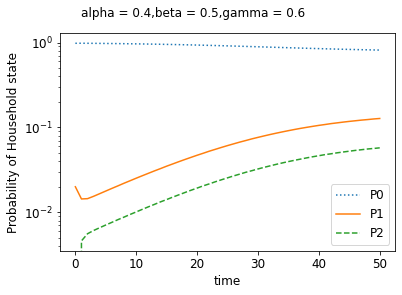

In [13]:
# assumption that outside infection rate is smaller but inside is higher

from scipy.integrate import solve_ivp
import numpy as np
import matplotlib.pyplot as plt
def odes(t, P):
    #constants
    # these values are taken from page 3 dyson et.al 
    alpha = 0.4
    beta = 0.5
    gamma = 0.6
    # assign each ODE to a vector element
    P0 = P[0]
    P1 = P[1]
    P2 = P[2]
    TI2 = P[3] # making expection rate as 4th vector with TI2 
    # define each ODE
    dP0dt = -alpha*(P1+2*P2)*P0 + gamma * P1
    dP1dt = alpha*(P1+2*P2)*P0 - (alpha/2*(P1+2*P2)+beta+gamma)*P1 + 2 * gamma * P2
    dP2dt = (alpha/2*(P1+2*P2)+beta)*P1 - 2 * gamma * P2
    dTI2dt = dP1dt + 2 * dP2dt
    #dexpIdt = alpha*(P1+2*P2)*P0+((alpha/2)*(P1+2*P2)+beta-gamma)*P1 - 2*gamma*P2
    return np.array([dP0dt,dP1dt,dP2dt,dTI2dt])
t_span = np.array([0,50])
times = np.linspace(t_span[0],t_span[1],51)
#intial conditions
Pi = np.array([0.98,0.02,0,-7.999999999999674e-05])


sol = solve_ivp(odes,t_span,Pi,t_eval=times)
print(sol)
t = sol.t
P0 = sol.y[0]# y not P
P1 = sol.y[1]
P2 = sol.y[2]
TI2 = sol.y[3]

plt.rc("font",size=12)
plt.figure()
plt.text(1,2,'alpha = 0.4,beta = 0.5,gamma = 0.6', fontsize=12 )
plt.semilogy(t,P0,':', label = 'P0')
plt.semilogy(t,P1,'-', label = 'P1')
plt.semilogy(t,P2,'--', label = 'P2')
#plt.semilogy(t,TI2,'.', label = 'TI2')
plt.xlabel("time")
plt.ylabel("Probability of Household state")
plt.legend()
plt.savefig("b5g6.eps")

#plt.show()

output_timelineb5g6= open("output_timelineb5g6.txt","w")

for i in range(len(t)):
    write_in = f"time: {t[i]}, P0: {P0[i]}, P1: {P1[i]}, P2: {P2[i]}, TI2: {TI2[i]}\n"
    output_timelineb5g6.write(write_in)
    #print(f"time: {t[i]}, P0: {P0[i]}, P1: {P1[i]}, P2: {P2[i]}, TI2: {TI2[i]}")

output_timelineb5g6.close()